# 1. Descargamos el dataset 📥💻 

El **dataset** que utilizaremos es de **Kaggle**, un gran lugar para conseguir datasets para tus estudios en **Ciencia de Datos** e **Inteligencia Artificial**.

El dataset es sobre una insuficiencia cardíaca. Puedes descargarlo [aquí](https://www.kaggle.com/ronitf/heart-disease-uci) en **Kaggle**. El objetivo de este **dataset** es predecir, dada otra información médica 👨‍⚕️, si alguien tiene la insuficiencia cardíaca 🫀.

# 2. Instalación de librerías y configuración inicial 👨🏻‍💻

In [ ]:
# Librerías y Dependencias

# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Modelos
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Normalización y Entrenamiento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# Evitamos la notación científica y rendondeamos los valores a 2 dígitos después de la coma
pd.options.display.float_format = '{:,.2f}'.format

# Evitamos los molestos warnings
warnings.simplefilter("ignore")

# 3. Cargamos los datos 💿💻

In [ ]:
# Cargamos nuestro dataset
data = pd.read_csv('https://raw.githubusercontent.com/jorge-robledo11/Datasets/main/Datasets/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.00,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.80,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.00,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.00,2,0,2,1


#### Información de atributos

1. Edad
2. Sexo
3. Tipo de dolor de pecho (4 valores)
4. Presión arterial en reposo
5. Colesterol sérico en mg/dl
6. Glucemia en ayunas > 120 mg/dl
7. Resultados electrocardiográficos en reposo (valores 0,1,2)
8. Frecuencia cardíaca máxima alcanzada
9. Angina inducida por el ejercicio
10. Depresión del ST inducida por el ejercicio en relación con el reposo
11. La pendiente del segmento ST máximo del ejercicio
12. Número de vasos mayores (0-3) coloreados por la fluroscopia
13. Thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
14. La etiqueta que fue otorgada al paciente, donde 1 = si ; 0 = no

In [ ]:
# Transformamos los datos a lo que mejor convenga y analizaremos los features del dataset
data.convert_dtypes().dtypes

age           Int64
sex           Int64
cp            Int64
trestbps      Int64
chol          Int64
fbs           Int64
restecg       Int64
thalach       Int64
exang         Int64
oldpeak     Float64
slope         Int64
ca            Int64
thal          Int64
target        Int64
dtype: object

In [ ]:
# Dimensionamos nuestro dataset
data.shape

(1025, 14)

In [ ]:
# Observamos si hay datos nulos en alguno de nuestros features
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Resumen de nuestro dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,"1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00","1,025.00"
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### Análisis del Resumen

- **count** ➜ **cantidades** de registros/observaciones de cada una de las columnas.
- **mean** ➜ la **media aritmética** total de cada una de las columnas.
- **std** ➜ la **desviación estándar** de cada una de las columnas.
- **min** ➜ el **valor mínimo** encontrado de cada una de las columnas.
- **max** ➜ el **valor máximo** encontrado de cada una de las columnas.
- Y los porcentajes corresponden a cada uno de los **quintiles** del total de cada una de las columnas.

# 4. Patrones en los datos 🔎👾

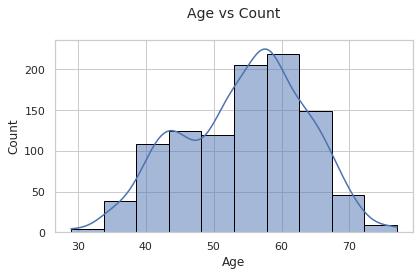

In [ ]:
# Hisplot
sns.set_theme(style="whitegrid")
sns.histplot(data=data, x='age', palette='pastel', edgecolor='black', linewidth=1, kde=True, bins=10)
plt.subplot(1,1,1)
plt.title('Age vs Count\n', fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.tight_layout()

### Análisis del Histplot 🔎📊

Podemos observar que existe una mayor **frecuencia** en las personas entre edades de $55$ a $60$ años aproximádamente, pero aunque puede ser interesante analizar este **patrón** no nos da mucha información debemos ser más minuciosos con lo que buscamos.

Como nuestro propósito es encontrar relación en nuestros **features** para seguir hayando **patrones** en los datos, optaremos por una **Matriz de correlación** para saber qué tan correlacionados se encuentran nuestros **features**

In [ ]:
# Correlation Matrix
matriz_corr = data.corr(method='spearman')

<AxesSubplot:>

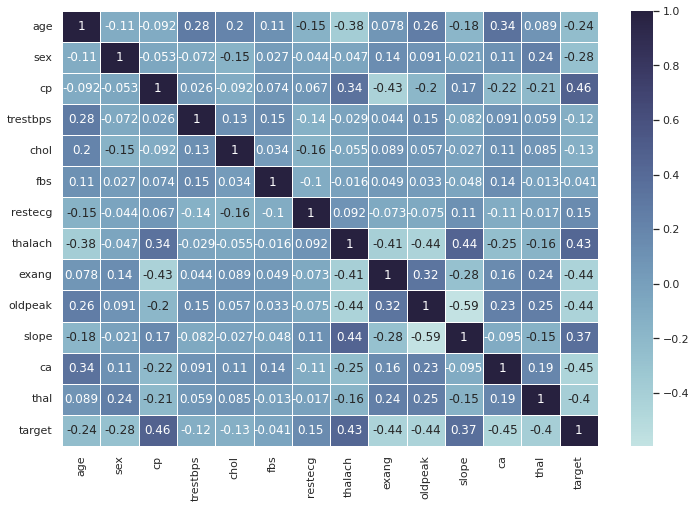

In [ ]:
# Heatmap
plt.subplots(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, linewidths=0.5, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True));

### Análisis de la Matriz de Correlación 🔢😳

Como pudimos notar no era lo que "esperábamos" en nuestros **features** hay **correlaciones** muy bajas por debajo del 50% de relevancia entre ellas, lo cuál hace más complejo a la hora de encontrar resultados, sin embargo podemos utilizar `thalach` con respecto a `age`, para ver cómo se comportan entre sí

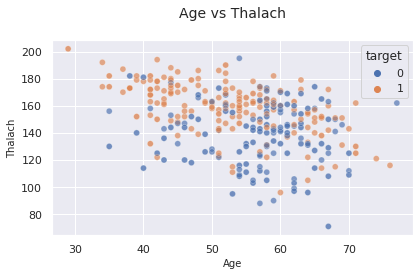

In [ ]:
# Scatterplot
sns.set_theme(style="darkgrid")
plt.subplot(1,1,1)
sns.scatterplot(data=data, x = 'age', y = 'thalach', color='red', alpha=0.3, hue='target')
plt.title('Age vs Thalach\n', fontsize=14)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Thalach',fontsize=10)
plt.tight_layout()

### Análisis del Scatterplot 📈🔍

Podemos notar pocos **valores atípicos** dentro de lo que cabe, por ejemplo una persona en edad menor a $30$ años y con una frecuencia cardíaca máxima alcanzada por encima de $200$, eso desde el punto de vista médico no es muy normal.

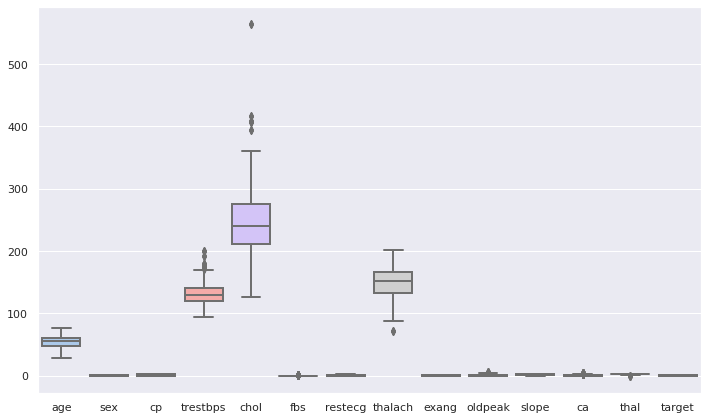

In [ ]:
# Boxplot
plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, palette='pastel', linewidth=2)
plt.tight_layout();

### Análisis del Boxplot

Muy poca **información significativa** hay realmente pocos **valores atípicos** y solo se concentran principalmente en dos **features** `trestbps` y `chol`. Para este punto, concluimos que para llegar a **resultados más profundos**, tendremos que utilizar un **método** más **efectivo**, para eso usaremos un modelo de **Machine Learning**, ya que de ese modo podremos saber si la **computadora** puede encontrar **comportamientos** en nuestros **datos** más considerables.

# 5. Procesamiento de los datos 🧑‍💻

In [ ]:
# Definamos nuestros features y nuestro target para el modelo
x = data.drop(['target'], axis=1)
y = data['target']

En nuestros **features** estaremos usando todas aquellas variables que están en el **dataset** distintas a `target` que es nuestra **etiqueta** por excelencia.

In [ ]:
# Normalizamos nuestros datos para evitar posibles ruidos en ellos
x = StandardScaler().fit_transform(x)

**Normalizamos** nuestros datos para evitar **ruido** en ellos y para que el **modelo** sea más **robusto** y **preciso** en sus **predicciones**.

In [ ]:
# Separamos nuestros datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Partiremos nuestros **datos** en **entrenamiento** y **prueba** en un $80$% - $20$% respectivamente.

In [ ]:
# Definimos a nuestro PCA y lo entrenamos con los features de entrenamiento
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(n_components=3)

Definimos que nuestro **PCA** solo tomará $3$ componentes de los $13$ **features** disponibles, los que él considere más relevantes, porque queremos encontrar resultados y minimizar **costo computacional**.

In [ ]:
# Transformamos los datos de entrenamiento con PCA
data_train = pca.transform(x_train)
data_test = pca.transform(x_test)

**Transformamos** los **datos** que teníamos previamente de **entrenamiento** en nuevo subconjunto que posteriormente utilizará nuestro **algortimo**

In [ ]:
# Dimensionamos para saber si todo va bien antes de realizar el modelo
print(x_train.shape)
print(y_train.shape)

(820, 13)
(820,)


Cómo podemos observar debe haber una concordancia entre las **dimensiones** de nuestras variables, para que no ocurran problemas más adelante, donde tenemos ahora $820$ **registros/observaciones** y $13$ **features** en nuestro **subconjunto de entrenamiento** `x_train` y solo $820$ registros en nuestra `y_train`.

In [ ]:
# Dimensionamos para saber si todo va bien antes de realizar el modelo con PCA
print(data_train.shape)
print(y_train.shape)

(820, 3)
(820,)


Aquí tenemos ahora $820$ **registros/observaciones** y $3$ **features** en nuestro **nuevo subconjunto de entrenamiento** `data_train` y solo $820$ **registros** en nuestra `y_train`.

# 6. Creamos nuestros modelos 🧠🤖

Utilizaremos un **clasificador** por la naturaleza de nuestro **dataset**, ya que previamente tenemos nuestros datos **etiquetados**

In [ ]:
# Definimos nuestro clasificador y lo entrenamos con el set de datos sin recudir
knn_classifier = KNeighborsClassifier().fit(x_train, y_train)

In [ ]:
# Definimos nuestro clasificador y lo entrenamos con el último set de datos reducido por PCA
knn_classifier_pca = KNeighborsClassifier().fit(data_train, y_train)

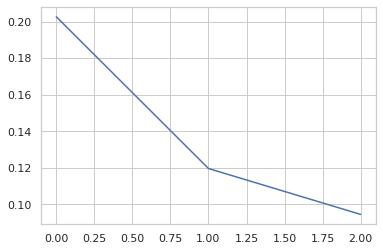

In [ ]:
# Graficamos los ratio de varianza
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

### Análisis de PCA

Reducimos los **features** de nuestro estudio a solo las $3$ que considere más importante **PCA**, lo cual **optimizamos en gran medida** tanto en **espacio en memoria** como en **minimización de cómputo** 🤓.

# 7. Predicciones 📈📉

In [ ]:
# Creamos la predicción de nuestro classifier
print('Matriz de Predicciones\n')
y_pred = knn_classifier.predict(x_test)
print(y_pred)

Matriz de Predicciones

[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1]


In [ ]:
# Creamos la predicción de nuestro classifier con PCA
print('Matriz de Predicciones con PCA\n')
y_pred_pca = knn_classifier_pca.predict(data_test)
print(y_pred_pca)

Matriz de Predicciones con PCA

[1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


### Análisis de las predicciones

Como podemos observar nuestros `y_pred` y `y_pred_pca` nos retornan unos **arrays** con la **predicciones** de las personas que pueden padecer o no de los **problemas cardíacos**, donde $1$ es Sí y $0$ es No 😯😯

In [ ]:
# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[84, 14],
       [11, 96]])

In [ ]:
# Matriz de confusión con PCA
cnf_matrix_pca = metrics.confusion_matrix(y_test,y_pred_pca)
cnf_matrix_pca

array([[88, 10],
       [13, 94]])

Podemos observar los **resultados** en estos pequeños **arrays** de 2x2, sin embargo no se ve muy estético que digamos... 🤔

Una herramienta muy útil para valorar cómo de bueno es nuestro modelo **clasificación** es una **Matriz de Confusión**, ya que nos permite mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos permite trabajar de forma separada con distintos **tipos de error**. 

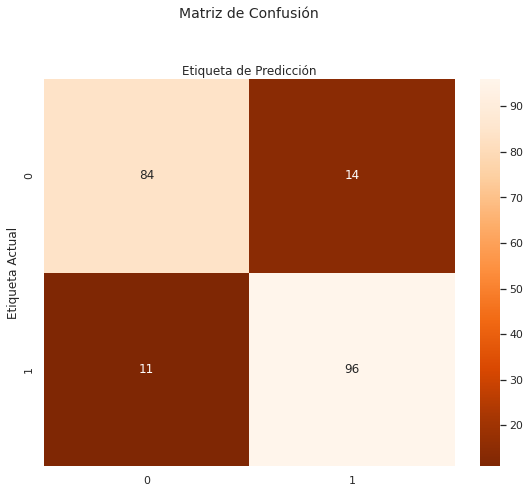

In [ ]:
# Confusion Matrix

# Definimos las etiquetas de nuestra Matriz de confusión
class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# Creamos nuestra Matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout()

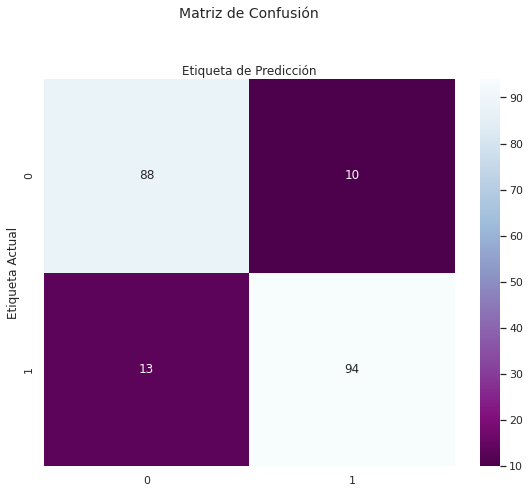

In [ ]:
# Confusion Matrix

# Definimos las etiquetas de nuestra Matriz de confusión
class_names = [0,1]
fig,ax = plt.subplots(figsize=(8,7)) 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

# Creamos nuestra Matriz de confusión
sns.heatmap(pd.DataFrame(cnf_matrix_pca), annot = True, cmap='BuPu_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Matriz de Confusión\n', y=1.1, fontsize=14)
plt.ylabel('Etiqueta Actual', fontsize=12)
plt.xlabel('Etiqueta de Predicción', fontsize=12)
plt.tight_layout()

In [ ]:
# Queremos conocer la cantidad de personas que paden y no padecen
y_pred = list(y_pred)

def funcion(y_pred):

    unos = []
    ceros = []

    for idx in y_pred:

        if idx == 1:
            unos.append(idx)

        else:
            ceros.append(idx)

    return unos, ceros


unos, ceros = funcion(y_pred)
unos = len(unos)
ceros = len(ceros)
print('Sí padecen: ', unos)
print('No padecen: ', ceros)

Sí padecen:  110
No padecen:  95


In [ ]:
# Queremos conocer la cantidad de personas que paden y no padecen con PCA
y_pred_pca = list(y_pred_pca)

def funcion(y_pred_pca):

    unos = []
    ceros = []

    for idx in y_pred_pca:

        if idx == 1:
            unos.append(idx)

        else:
            ceros.append(idx)

    return unos, ceros


unos, ceros = funcion(y_pred_pca)
unos = len(unos)
ceros = len(ceros)
print('Sí padecen: ', unos)
print('No padecen: ', ceros)

Sí padecen:  104
No padecen:  101


# 8. Evaluamos nuestros modelos 💻🤖

In [ ]:
# Veamos el Accuracy de nuestro modelo
acc = round(knn_classifier.score(x_test, y_test),4)
print('K-Neighbors Classifier sin PCA')
print(f'Acurracy Score: {acc*100}%')

K-Neighbors Classifier sin PCA
Acurracy Score: 87.8%


In [ ]:
# Veamos el Accuracy de nuestro modelo con PCA
acc_pca = round(knn_classifier_pca.score(data_test, y_test),4)
print('K-Neighbors Classifier con PCA')
print(f'Acurracy Score: {acc_pca*100}%')

K-Neighbors Classifier con PCA
Acurracy Score: 88.78%


### Análisis de Resultados
Como podemos observar para nuestro estudio y comparando el factor de **reducción de dimensionalidad** nuestro clasificador con **PCA** aún con menos features logró llegar a un **Accuracy Score** mayor que con mayor features, lo cuál es muy bueno desde el punto de vista de **performance** y **optimización de recursos**, porque reduce la carga de **cómputo** generando mayor **eficiencia**

# 9. Conclusiones 📋🖊

-  Llevamos a cabo un estudio con la **técnica de EDA (Exploratory Data Analysis)**.
- **PCA (Principal Component Analysis)** redujo considerablemente nuestros **features de entrada**, pasamos de 13 a solo 3, pero sin **pérdida de información** y generando una **predicción notable** con **Accuracy Score** del **88.78%** como **métrica**.
- Comparando ambos **algoritmos** e identifcamos que más **features** no siempre devuelve **mejores resultados**, porque en ocasiones las **variables** no tienen mucha **correlación** entre ellas y por ello no son **explicativas** entre sí, lo pudimos notar en nuestra **Matriz de Correlación**.
- **Optimizamos recursos en cómputo y rendimiento**, por medio de **PCA** obteniendo **mayor eficiencia**.
- No se observó mucho **ruido** en los **datos**, lo cual fue bueno desde el **punto de vista analítico**.
- Nuestro algoritmo de **K-Neighbors** logró **clasificar** a los pacientes de acuerdo a los **datos** suministrados.

# 10. Trabajo finalizado 📄✔

![link text](https://media.giphy.com/media/fDzM81OYrNjJC/source.gif?cid=ecf05e471mkgebs0ci5cquqshmfeg7fbpcbmws5rspjgh31e&rid=source.gif&ct=g)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ec84517-f553-446b-9032-1da3132bd62a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>